<a href="https://colab.research.google.com/github/Fbehr-data/Radiant-Earth-Spot-Crop/blob/main/notebooks/EDA_spectral_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook EDA - Spectral Indices

A list of all indices can be found here:
https://www.indexdatabase.de/db/s-single.php?id=96

I selected just a few indices based on these papers:
DOI: 
* 10.1080/24751839.2019.1694765
* 10.5073/vitis.2019.58.special-issue.33-38

Following Bands and Indices are investigated regarding the separability of the classes.
* Bands    [02/03/04/08/11/12]
* Indices  [NDVI, SIPI2, WET, PVR]
* PCA      [PC1]

Connect to Google Drive and have access to the data

In [1]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set Working Directory

In [2]:
import os
# set working directory
# os.getcwd()
path = '/content/drive/MyDrive/Radiant_Earth_Spot_Crop'
# Set Workign directory and print
os.chdir(path)
print(f'Current Working directory: {path}')

Current Working directory: /content/drive/MyDrive/Radiant_Earth_Spot_Crop


Load packages

In [3]:
# import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# To avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Radiant_Earth_Spot_Crop/data/mean_band_perField_perDate.csv')
df.head()

,field_id,date,label,B02,B03,B04,B08,B11,B12,CLM
0,1,2017-04-01,4,21.934084,29.180065,35.554660,62.490353,68.39710,46.040190,255.0
1,1,2017-04-11,4,14.844051,23.114147,30.607718,58.736336,73.43569,48.863342,0.0
2,1,2017-04-21,4,13.385852,21.596462,29.223473,57.065918,73.66881,49.313503,0.0
3,1,2017-05-01,4,15.408361,22.471062,29.371382,56.434082,71.05788,46.557877,0.0
4,1,2017-05-11,4,54.829582,65.739550,72.906750,95.672030,66.14791,58.643085,255.0


In [5]:
# Split in Target and Feature
y = df['label']
X = df.drop('label', axis=1)

# Split test train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine X_train and y_train for EDA
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,field_id,date,B02,B03,B04,B08,B11,B12,CLM,label
2325284,66423,2017-11-12,136.666670,128.944440,123.388885,142.888890,118.444440,101.777780,255.0,4
3500683,99982,2017-07-13,2.914614,17.935429,17.658453,90.157600,68.190740,44.104504,0.0,7
2047147,58441,2017-09-21,100.801430,97.865770,93.773630,99.891180,49.814137,48.208103,255.0,2
1225055,35017,2017-11-02,35.030964,46.109710,65.538994,81.319190,116.401760,91.486620,255.0,9
1223661,34982,2017-05-31,20.412214,30.575064,41.567430,52.737915,82.104324,68.020355,0.0,7
...,...,...,...,...,...,...,...,...,...,...
4044887,115404,2017-10-03,14.676767,17.649832,17.599327,48.151516,48.198654,34.134680,0.0,4
1136074,32500,2017-10-08,18.343150,27.148357,33.588900,86.502830,96.764440,64.424690,0.0,2
1570006,44838,2017-07-30,2.375000,3.252976,4.244048,5.901786,9.949405,8.934524,0.0,4
2234489,63790,2017-09-08,10.960526,16.559210,16.463816,58.996710,57.253290,33.486843,0.0,5


# Explorative Data Analyses (EDA) - Indices




In [6]:
# Calculating spectral Indices
# See here: https://www.indexdatabase.de/db/is.php?sensor_id=96


# Define Function to calculate different indices
# NDVI
def cal_NDVI(Band4: pd.Series, Band8: pd.Series) -> pd.Series:
  return (Band8 - Band4) / (Band8 + Band4) 

# SIPI2
def cal_SIPI2(Band2: pd.Series, Band8: pd.Series, Band4:pd.Series) -> pd.Series:
  return (Band8 - Band2) / (Band8 - Band4)

# WET
def cal_WET(Band2: pd.Series, Band3: pd.Series, Band4:pd.Series, Band8: pd.Series, Band11: pd.Series, Band12:pd.Series) -> pd.Series:
  return 0.1509 * Band2 +0.1973 * Band3 + 0.3279 * Band4 + 0.3406 * Band8 - 0.7112 * Band11 - 0.4572 * Band12

# PVR
def cal_PVR(Band3: pd.Series, Band4: pd.Series) -> pd.Series:
  return (Band3 - Band4) / (Band3 + Band4) 

# First PC1
def cal_PC1(all_Bands: pd.DataFrame) -> pd.Series:
  # create PCA model
  pca = PCA(n_components=2)
  
  # fit on bands
  pca.fit(all_Bands)

  # Print results
  print('****' * 10)
  print(f'Explained Variance of the first 2 components:')
  print(f'PC1: {np.around(pca.explained_variance_ratio_[0], 3) * 100} %')
  print(f'PC2: {np.around(pca.explained_variance_ratio_[1], 3) * 100} %')
  print(f'Only the first component of the PC will be used.')

  # Tranform data
  pca_df = pca.transform(all_Bands)

  return pd.DataFrame(data = pca_df
             ,columns = ['PC1', 'PC2'])['PC1']

# Calculate Features

# Returns dataframe with additional features
def cal_features(df:pd.DataFrame) -> pd.DataFrame:

  # Define list with all bands
  Bands = ['B02', 'B03', 'B04', 'B08', 'B11', 'B12']

  # calculate Indices and PC1
  df['NDVI'] = cal_NDVI(df.B04, df.B08)
  df['SIPI2'] = cal_SIPI2(df.B02, df.B04, df.B08)
  df['WET'] = cal_WET(df.B02,df.B03, df.B04, df.B08, df.B11, df.B12)
  df['PVR'] = cal_PVR(df.B03, df.B04)
  df['PC1'] = cal_PC1(df[Bands])

  return df 


In [7]:
# Add additional features to the dataframe
df_features = cal_features(df_train)

# Check Data and columns
df_features

****************************************
Explained Variance of the first 2 components:
PC1: 90.0 %
PC2: 8.1 %
Only the first component of the PC will be used.


,field_id,date,B02,B03,B04,B08,B11,B12,CLM,label,NDVI,SIPI2,WET,PVR,PC1
2325284,66423,2017-11-12,136.666670,128.944440,123.388885,142.888890,118.444440,101.777780,255.0,4,0.073232,0.680912,4.420423,0.022017,-41.482752
3500683,99982,2017-07-13,2.914614,17.935429,17.658453,90.157600,68.190740,44.104504,0.0,7,0.672434,-0.203366,-28.185473,0.007782,NaN
2047147,58441,2017-09-21,100.801430,97.865770,93.773630,99.891180,49.814137,48.208103,255.0,2,0.031588,1.148793,41.822602,0.021353,-56.523842
1225055,35017,2017-11-02,35.030964,46.109710,65.538994,81.319190,116.401760,91.486620,255.0,9,0.107452,-1.933311,-61.041444,-0.174022,-38.474641
1223661,34982,2017-05-31,20.412214,30.575064,41.567430,52.737915,82.104324,68.020355,0.0,7,0.118450,-1.893849,-48.786344,-0.152370,146.759152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044887,115404,2017-10-03,14.676767,17.649832,17.599327,48.151516,48.198654,34.134680,0.0,4,0.464666,-0.095658,-22.016997,0.001433,NaN
1136074,32500,2017-10-08,18.343150,27.148357,33.588900,86.502830,96.764440,64.424690,0.0,2,0.440613,-0.288124,-49.672822,-0.106039,-85.498894
1570006,44838,2017-07-30,2.375000,3.252976,4.244048,5.901786,9.949405,8.934524,0.0,4,0.163391,-1.127468,-6.758910,-0.132195,-24.630401
2234489,63790,2017-09-08,10.960526,16.559210,16.463816,58.996710,57.253290,33.486843,0.0,5,0.563644,-0.129389,-25.614884,0.002889,-112.733142


In [8]:
# Change datatype str to Datetime of timecolumn
df_features['date'] = pd.to_datetime(df_features["date"])

# create relevant subset -> Calculate the month in the year
df_features['month'] = df_features['date'].dt.month

# Plot Function

In [9]:
# plot function to see time 
def plot_2_features(data:pd.DataFrame, feature1:str, feature2:str):

  plt.style.use('ggplot')
  # set size 
 

  fig, axs = plt.subplots(ncols=2, figsize =(25,8))

  # create dictionary for date and label --> increase readability
  dic_month = {4: 'April', 5: 'Mai', 6: 'June', 7: 'July',
             8: 'August', 9: 'September', 10: 'October', 11: 'November'}

  dic_class = {1: 'Lucerne', 2: 'Planted Pastures', 3: 'Fallow', 4: 'Wine Grapes',
             5: 'Weeds', 6: 'Small grain grazing', 7: 'Wheat', 8: 'Canola', 9: 'Rooibos'}

  # Map new label -->TODO: Unknown reason for warning
  data['Month'] = data['month'].map(dic_month)
  data['Croptype'] = data.loc[:, ('label')].map(dic_class)

  g1 = sns.lineplot(data=data, x="month", y=feature1, hue="Croptype", palette="Dark2", ax = axs[0])

  g2=sns.lineplot(data=data, x="month", y=feature2, hue="Croptype", palette="Dark2", ax = axs[1])

  # Change x-ticks
  g1.set_xticklabels(['','April','Mai','June', 'July',
             'August', 'September', 'October', 'November'])
  g2.set_xticklabels(['','April','Mai','June', 'July',
             'August', 'September', 'October', 'November'])
  # Change Title
  g2.set_title('Mean per Month + Confidence Intervall (95%) of ' + feature2,fontdict = { 'fontsize': 18, 'fontweight':'bold'}, loc='left')
  g1.set_title('Mean per Month + Confidence Intervall (95%) of '+ feature1,fontdict = { 'fontsize': 18, 'fontweight':'bold'}, loc='left')
  
  # Set subtitle
  #plt.subtitle(' Feature Mean per Month + 95% Confindence Interval')
  #plt.suptitle('Mean per Month + 95% Confindence Interval')

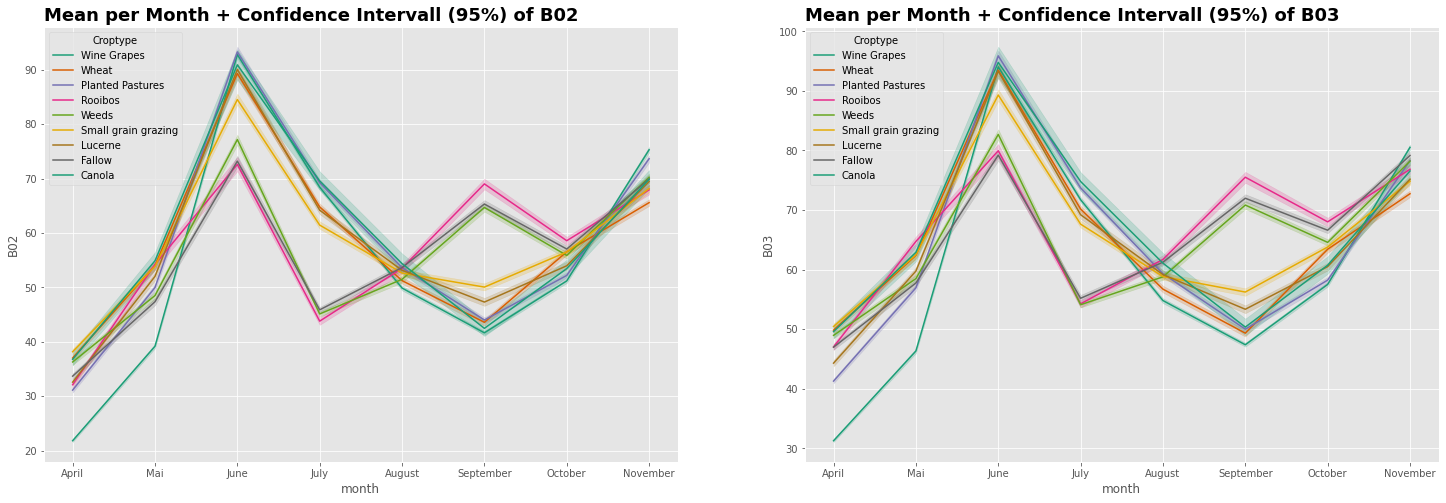

In [10]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'B02', 'B03')

- Seperability B02:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B03:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Quite similar

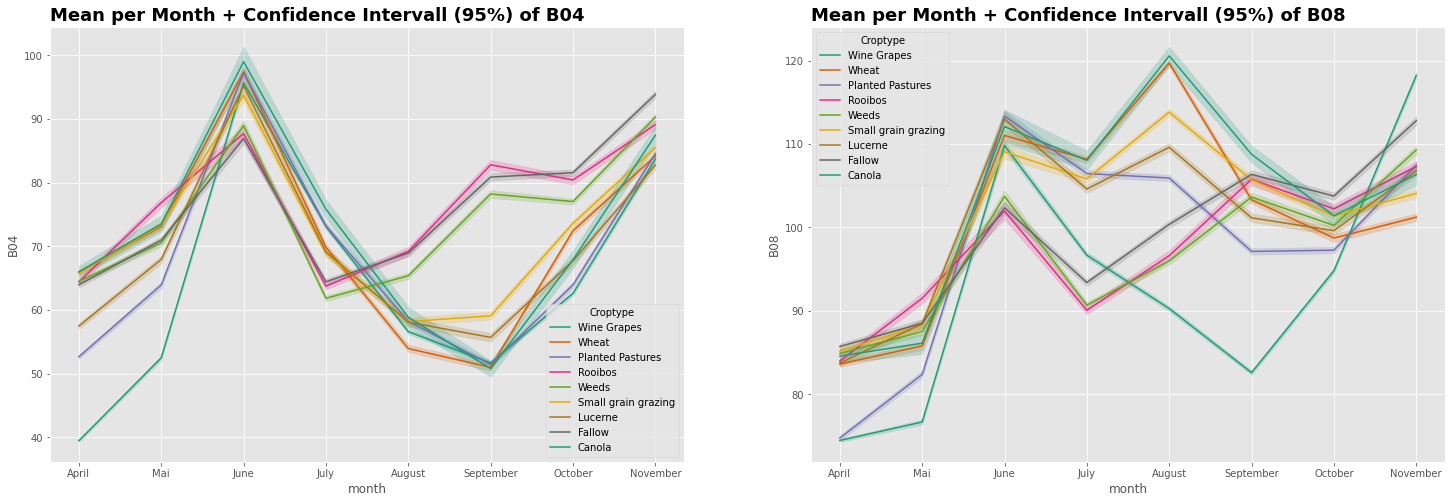

In [11]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'B04', 'B08')

- Seperability B04:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B08:
  Winegrapes --> September
  Canola and Wheat in August

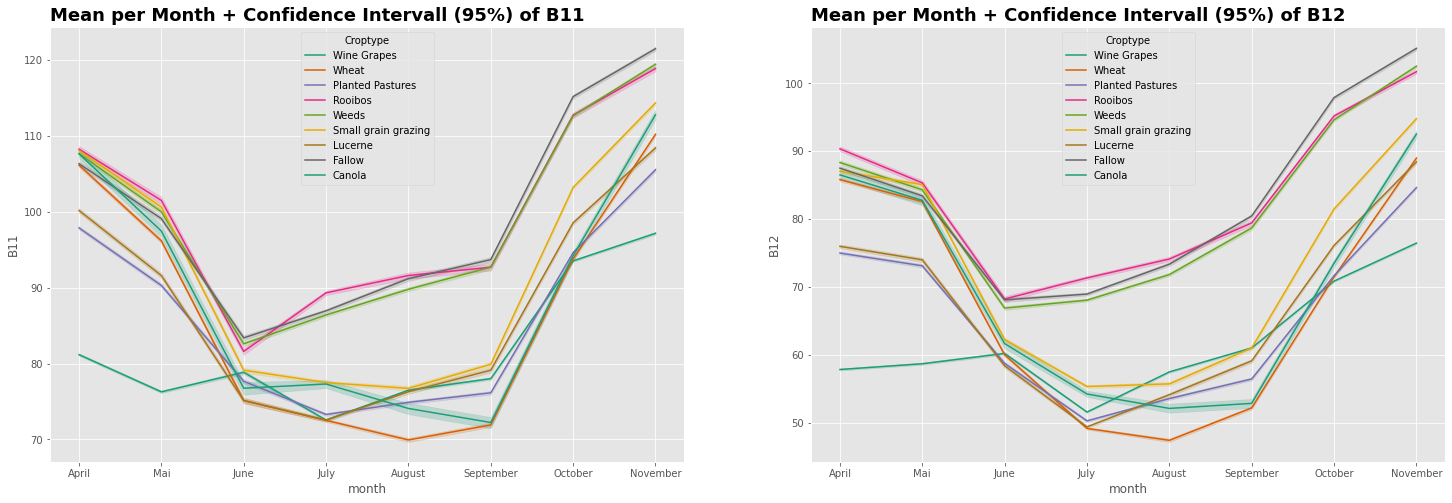

In [12]:
# Plot B11 and B12 Band
plot_2_features(df_features, 'B11', 'B12')

- Seperability B11:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B12:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Quite similar

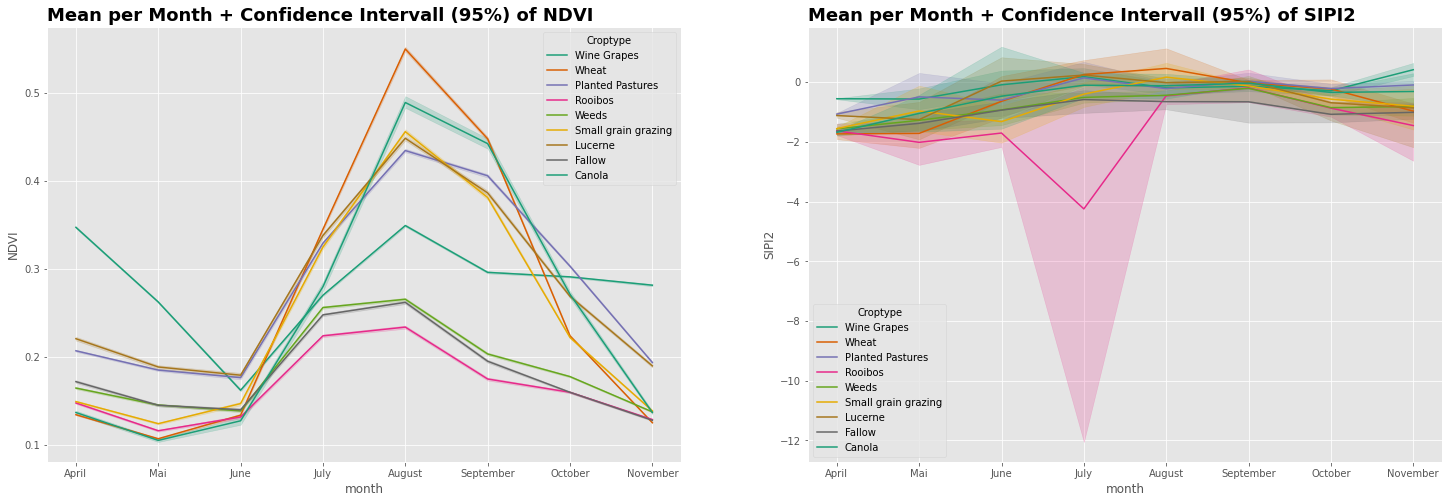

In [13]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'NDVI', 'SIPI2')

- Seperability NDVI:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability B03:
  SIPI is not a good seperator

- Quite similar

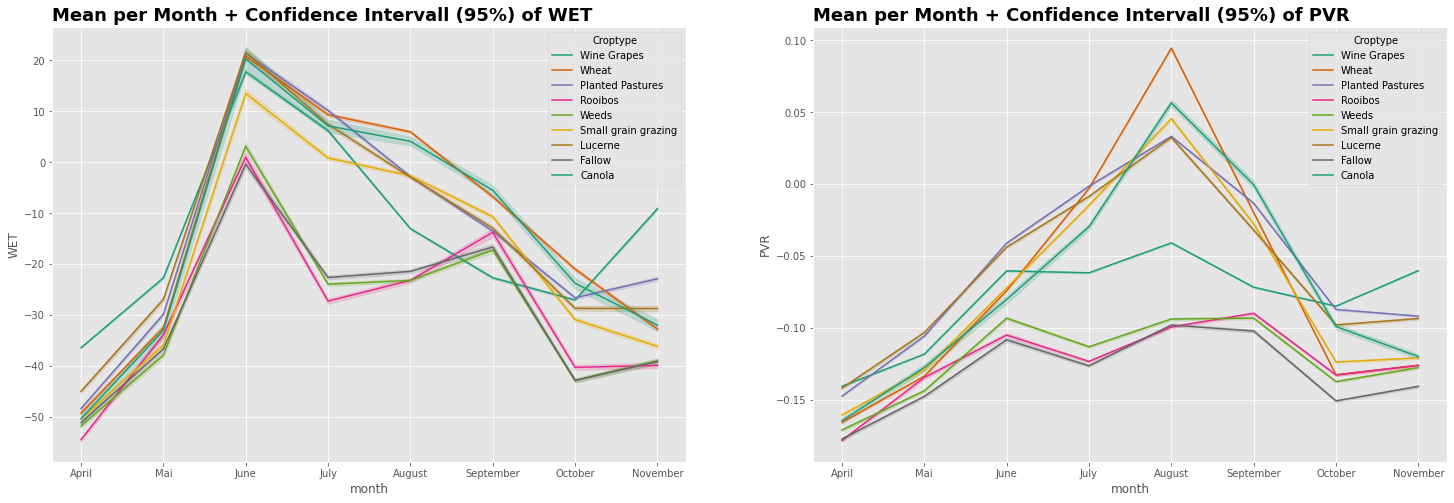

In [14]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'WET', 'PVR')

- Seperability WET:
  Rooibos, Fallow, Weed against rest --> September and July
  winegrapes August Mai and April

- Seperability PVR:
  see November 

- Quite similar

ValueError: ignored

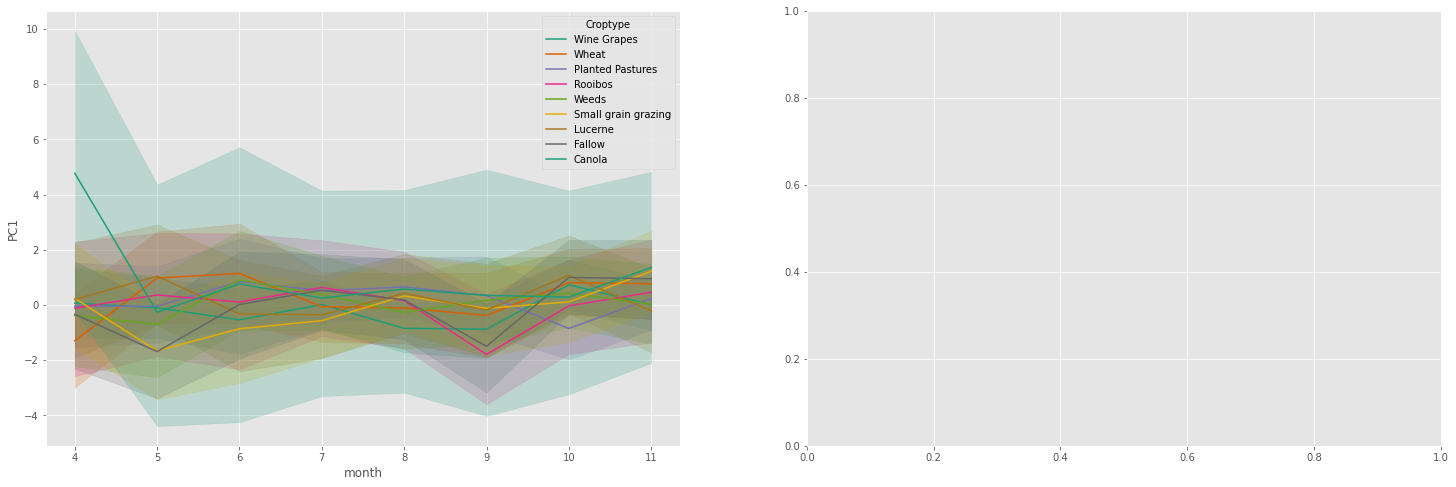

In [17]:
# Plot B02 and B03 Band
plot_2_features(df_features, 'PC1', ' B01')

not a good feature for seperability

# Conclusion:

Add following Features:
* NDVI
* WET
* PVR

In [ ]:
# HELPER FUNCTION
# Choose random number of fields
sub_fields_id = np.random.choice(df_features.field_id.unique(), 1000, replace=False)

# subset data based on random number of fields
subset_data = df_features.query('field_id in @sub_fields_id')
subset_data